<a href="https://colab.research.google.com/github/TerMinator-spec/listings_chicago/blob/master/listing_chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.0MB/s 
     |████████████████████████████████| 6.5MB 8.9MB/s 
     |████████████████████████████████| 15.3MB 283kB/s 


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
listing=pd.read_csv('/content/listings.csv')
listing.drop('neighbourhood_group',1,inplace=True)
listing.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,65,2,182,2021-03-28,2.38,1,0
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85373,-87.69540,Entire home/apt,113,2,395,2020-07-14,2.67,1,180
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,65,2,394,2021-04-11,2.74,1,267
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91943,-87.63898,Entire home/apt,120,5,54,2021-01-15,0.63,11,1
4,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,175,4,22,2021-03-25,0.26,11,125


In [ ]:
listing.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.386000e+03,6.386000e+03,0.0,6386.000000,6386.000000,6386.000000,6386.000000,6386.000000,5168.000000,6386.000000,6386.000000
mean,3.056454e+07,1.150096e+08,NaN,41.898929,-87.663195,161.330254,9.024272,42.291889,1.605012,15.982148,157.044785
std,1.407447e+07,1.144597e+08,NaN,0.058699,0.042860,360.998390,24.236983,69.484109,1.710903,44.453948,136.275636
min,2.384000e+03,2.153000e+03,NaN,41.650640,-87.934820,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.998291e+07,1.969191e+07,NaN,41.873712,-87.686780,67.000000,1.000000,1.000000,0.370000,1.000000,11.000000
50%,3.344259e+07,6.905864e+07,NaN,41.900755,-87.659125,102.000000,2.000000,12.000000,1.060000,2.000000,126.000000
75%,4.293678e+07,1.846707e+08,NaN,41.939615,-87.632288,164.000000,4.000000,54.000000,2.380000,9.000000,298.000000
max,4.927557e+07,3.967887e+08,NaN,42.022200,-87.535880,9999.000000,500.000000,801.000000,29.540000,233.000000,365.000000


In [5]:
#convert to geodataframe
listing_geo = gpd.GeoDataFrame(listing,crs={'init' :'epsg:4326'}, geometry=gpd.points_from_xy(listing.longitude, listing.latitude))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
listing_geo.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,65,2,182,2021-03-28,2.38,1,0,POINT (-87.58780 41.78790)
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85373,-87.69540,Entire home/apt,113,2,395,2020-07-14,2.67,1,180,POINT (-87.69540 41.85373)
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,65,2,394,2021-04-11,2.74,1,267,POINT (-87.68021 41.90166)
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91943,-87.63898,Entire home/apt,120,5,54,2021-01-15,0.63,11,1,POINT (-87.63898 41.91943)
4,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,175,4,22,2021-03-25,0.26,11,125,POINT (-87.63981 41.91196)


In [7]:
nebor=gpd.read_file("neighbourhoods.geojson")
nebor.drop('neighbourhood_group',1,inplace=True)
nebor.head()

,neighbourhood,geometry
0,Lincoln Square,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ..."
1,Hyde Park,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ..."
2,Woodlawn,"MULTIPOLYGON (((-87.57715 41.78615, -87.57715 ..."
3,Rogers Park,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ..."
4,Jefferson Park,"MULTIPOLYGON (((-87.75263 41.96797, -87.75279 ..."


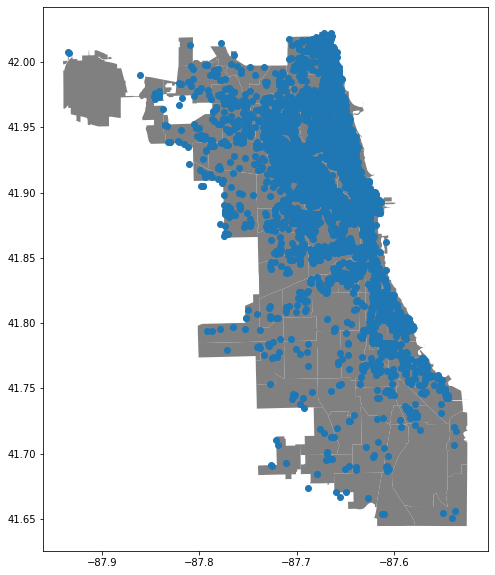

In [ ]:
# Now let's plot listings with the neighbourhood
fig, ax = plt.subplots(figsize=(12,10))
nebor.plot(color="Gray", ax= ax);
listing_geo.plot(ax=ax)

In [ ]:
# Top areas with highest number of listing
lis_top=listing.groupby('neighbourhood')['calculated_host_listings_count'].sum().reset_index()

In [ ]:
lis_top

,neighbourhood,calculated_host_listings_count
0,Albany Park,164
1,Archer Heights,8
2,Armour Square,545
3,Ashburn,25
4,Auburn Gresham,11
...,...,...
72,West Lawn,14
73,West Pullman,4
74,West Ridge,465
75,West Town,4781


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text major ticklabel objects>)

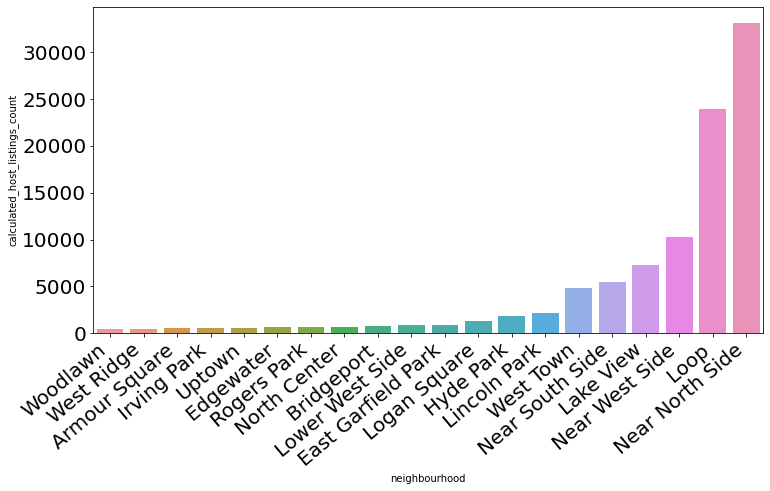

In [ ]:
# Let's find top 20 neighborhood having highest listing count
sort_data=lis_top.sort_values("calculated_host_listings_count").reset_index(drop=True)


fig = plt.figure(figsize = (12,6))
ax=sns.barplot(x="neighbourhood",y="calculated_host_listings_count", data=sort_data[-20:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [18]:
# Let's merge the two dataset
merged = nebor.merge(listing, on="neighbourhood")

In [19]:
merged

,neighbourhood,geometry,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lincoln Square,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",507517,Private Lincoln Square Garden Apt,2501182,Nate,41.96678,-87.69730,Entire home/apt,98,2,293,2021-04-07,2.74,1,135
1,Lincoln Square,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",584590,"Spacious Bedroom, steps to El train",2880338,Elizabeth,41.96528,-87.68310,Private room,75,2,44,2020-10-06,0.41,2,138
2,Lincoln Square,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",739495,Lovely 2 bedroom in Lincoln Square,3867687,Janet,41.97650,-87.68144,Entire home/apt,84,28,186,2020-03-12,1.97,1,105
3,Lincoln Square,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",2479175,Cozy Garden-Subterranean Apartment,12681444,Jenny,41.96316,-87.69208,Entire home/apt,80,2,185,2021-04-19,2.17,1,87
4,Lincoln Square,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",4278432,2BD in Lincoln Square Neighborhood,19538870,Jackie,41.96833,-87.68547,Entire home/apt,150,3,78,2019-11-06,1.00,1,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,Morgan Park,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...",44520255,Blue Island Living,360063492,NaN,41.67355,-87.68833,Entire home/apt,122,2,36,2021-04-12,4.24,1,327
6382,Morgan Park,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...",46795021,House of Relaxation,378142375,Laura,41.68817,-87.65018,Entire home/apt,100,1,0,NaN,NaN,1,138
6383,Morgan Park,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...",48771681,Privacy Respected,393449794,Pamela,41.69065,-87.64623,Entire home/apt,60,3,1,2021-04-11,1.00,1,12
6384,Edison Park,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",16716143,Entire Unique Home in Edison Park,30561059,Brendan,42.01312,-87.80916,Entire home/apt,139,3,240,2021-04-18,4.73,2,257


In [20]:
# Let's plot the thematic map 
keys = list(merged['room_type'].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

In [21]:
row_count = merged['room_type'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
ax_string = ', '.join(ax_list)

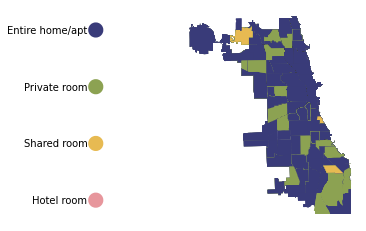

In [22]:
# Thematic plot for different room types
fig, (ax_string) = plt.subplots(row_count, 4)
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in merged.iterrows():
     plot = merged[merged['id'] == row['id']].plot(color=color_dict[row['room_type']], ax=ax1)
     ax1.axis('off')
     
row_counter = 0
for i in merged['room_type'].unique():
  plt.subplot2grid((row_count,4),(row_counter,0))
  plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
  plt.axis('off')
  row_counter += 1


In [9]:
# Find the number of listing per host
host_listing=listing.groupby('host_name')['calculated_host_listings_count'].sum().reset_index()

In [10]:
host_listing

,host_name,calculated_host_listings_count
0,(Email hidden by Airbnb),1
1,A,1
2,A Tavola,1
3,Aaron,7
4,Aaron & Molly,1
...,...,...
1786,Zhanara,1
1787,Zhe,1
1788,Zhi,36
1789,Zichen,1


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text major ticklabel objects>)

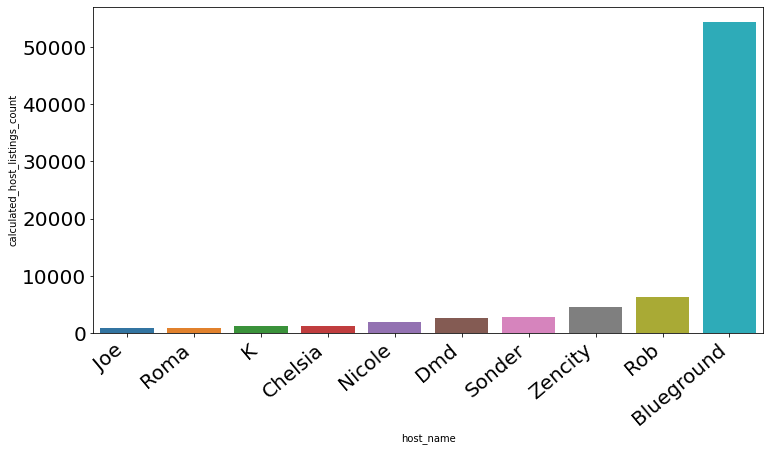

In [12]:
# Let's find top 10 host with highest listing count
sort_data=host_listing.sort_values("calculated_host_listings_count").reset_index(drop=True)

fig = plt.figure(figsize = (12,6))
ax=sns.barplot(x="host_name",y="calculated_host_listings_count", data=sort_data[-10:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

([<matplotlib.patches.Wedge at 0x7fe166a1b3d0>,
 [Text(-0.36754774940633905, -1.036778014768029, 'Entire home/apt'),
  Text(0.7284339729462012, 0.9536162472702597, 'Hotel room'),
  Text(0.3645145173650391, 1.0378483350808696, 'Private room'),
  Text(0.03135656533753936, 1.1995902491310244, 'Shared room')],
 [Text(-0.20048059058527581, -0.5655152807825612, '89.2%'),
  Text(0.4249198175519507, 0.5562761442409848, '0.9%'),
  Text(0.19882610038093038, 0.5660990918622925, '9.1%'),
  Text(0.018291329780231295, 0.699760978659764, '0.8%')])

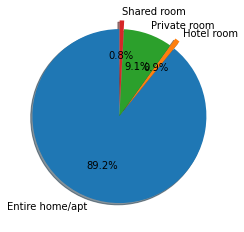

In [15]:
# Let's try to find out relation between room type and number of listing 
room_listing=listing.groupby('room_type')['calculated_host_listings_count'].sum().reset_index()
# Draw a pie chart
plt.pie(x=room_listing["calculated_host_listings_count"], labels=room_listing["room_type"], explode=[0, 0.1, 0,0.1],
        autopct='%1.1f%%', shadow=True, startangle=90)
